<a href="https://colab.research.google.com/github/fujii-hcu/Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pytrendsを用いてGoogleトレンドといったワードの検索ボリュームの推移がわかるサイトを用いて情報を扱う。プログラム内容としては、入力したワードと比較するワードを入力し、それぞれの検索ボリュームを表示する。その際、期間は2022年の12月から2023年の12月までとする。また、それらの平均、及び最初に検索するワードの検索ボリュームの上位5個を記録した期間と同時期の二番目に入力されたワードのボリュームを表示する。

これは二つのワードの検索ボリュームの推移を体感するときに役に立つ。Googleトレンドとの差別化としては上位５つを表示する点が挙げられる。


主にはこちらのサイトからの引用となる。https://norari-kurari-way.com/python-trend/#google_vignette



In [2]:
!pip install pytrends

検索するワードを入力：広島
広島と比較するキーワード：滋賀


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24195 (\N{CJK UNIFIED IDEOGRAPH-5E83}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23798 (\N{CJK UNIFIED IDEOGRAPH-5CF6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28363 (\N{CJK UNIFIED IDEOGRAPH-6ECB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36032 (\N{CJK UNIFIED IDEOGRAPH-8CC0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


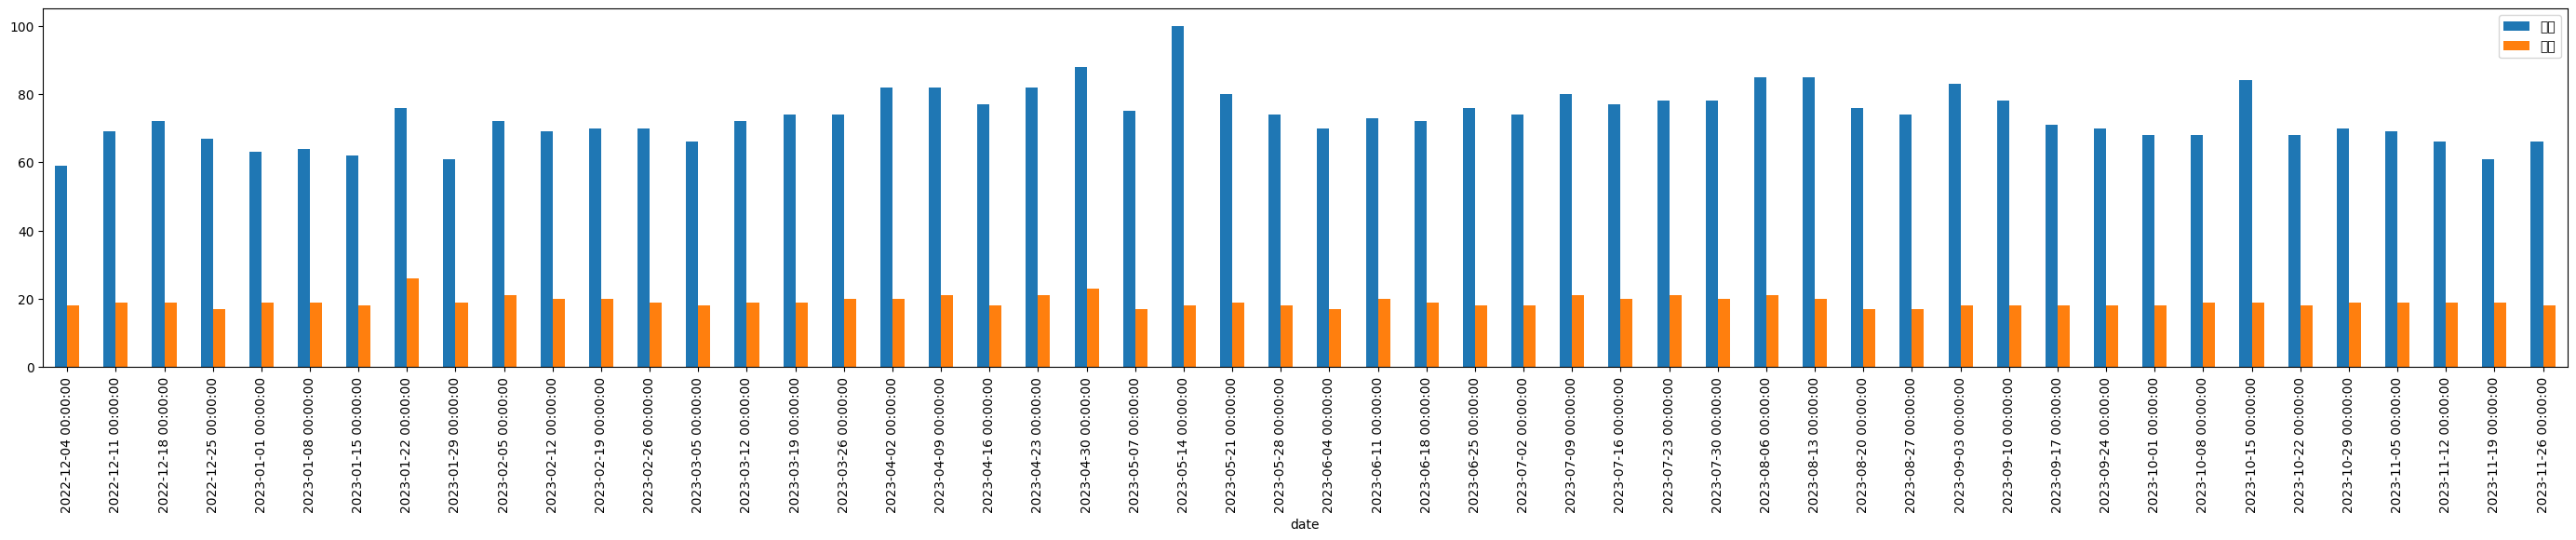

             広島  滋賀
date               
2023-05-14  100  18
2023-04-30   88  23
2023-08-13   85  20
2023-08-06   85  21
2023-10-15   84  19
広島の平均:73.46153846153847
滋賀の平均:19.115384615384617


In [4]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd
pytrends=TrendReq(hl='ja-JP',tz=-540)
keyword=input("検索するワードを入力：")
keyword2=input(f"{keyword}と比較するキーワード：")
kw_list=[keyword,keyword2]
#year=input("何年度:")
#month=input("何月:")
pytrends.build_payload(kw_list,timeframe="2022"+"-"+"12"+"-01 2023-12-01",geo='JP')
trend=pytrends.interest_over_time().drop("isPartial",axis=1)

plt.rcParams["figure.figsize"]=35,5
trend.plot.bar()
sorted_trend = trend.sort_values(by=keyword,ascending=False)
keymean=trend[keyword].mean()
keymean2=trend[keyword2].mean()

plt.show()
print(sorted_trend.head())
print(f"{keyword}の平均:{keymean}")
print(f"{keyword2}の平均:{keymean2}")